# Example Notebook: Demonstrating the Company Object

This notebook serves as an example to showcase how the Company object works. It includes the creation, manipulation, and usage of the Company object, highlighting its features and functionality. The examples provided will help users understand how to interact with the Company object in various scenarios.

In [1]:
from PyFinModeler import (Company, BorsdataCollector) 
import os
api_key = os.environ.get("BORSDATA_API_KEY")
if not api_key:
    raise ValueError("API Key not found. Please set BORSDATA_API_KEY.")

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import Markdown, display

collector = BorsdataCollector(api_key=api_key)
company = collector.fetch_company("Evolution", report_type="r12")

display(Markdown(f"**Company Name:** {company.name}"))  # Output: Company A
display(Markdown(f"**Description:** {company.description}"))  # Output: The English description of Company A

**Company Name:** Evolution

**Description:** Evolution operates in the gaming industry and focuses on the development and delivery of live casino solutions for online gaming companies. The company's platforms offer realistic gaming experiences with live dealers. The business is global with the largest presence in Europe, North America and Asia. Evolution was founded in 2006 and is headquartered in Stockholm, Sweden.

In [3]:
income_statement = company.get_statement_as_dataframe("income_statement")
income_statement

,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,...,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2,2024Q3,2024Q4,2025Q1
Item,,,,,,,,,,,,,,,,,,,,,
revenues,549.223650,622.670702,689.811261,781.155001,881.492458,998.043104,1106.115651,1245.629878,1401.414017,1559.261418,...,16261.804830,17556.202910,19501.783090,19989.242907,20031.030057,21527.053480,22006.447181,23354.810674,25364.951573,24263.915878
gross_Income,549.223650,622.670702,689.811261,781.155001,881.492458,998.043104,1106.115651,1245.629878,1401.414017,1559.261418,...,16261.804830,17556.202910,19501.783090,19989.242907,20031.030057,21527.053480,22006.447181,22679.917516,23634.449589,22622.977693
operating_Income,138.007065,165.825405,193.387879,262.420413,285.329368,310.977113,333.996900,387.501690,464.036722,560.040421,...,10136.851757,10947.207910,12235.452715,12590.338817,12726.590821,13613.371559,13769.268266,14759.590910,16262.225656,15331.742862
profit_Before_Tax,141.955659,165.900232,193.351183,262.217180,284.568465,309.801323,331.755181,384.606321,461.166591,557.200850,...,10120.453058,10866.099303,12139.807325,12542.917274,12792.043005,13765.046712,13979.110563,14896.594787,16484.137464,15464.792492
profit_To_Equity_Holders,132.693069,158.249198,183.736833,242.743732,262.990748,285.668720,304.069000,352.050140,422.256081,511.546323,...,9414.583404,10095.764535,11301.318033,11682.157368,11926.151928,12531.585556,12422.907006,13008.749476,14251.283784,13356.312173
net_Sales,549.195973,622.661349,689.811261,780.573015,878.533389,994.785589,1102.139954,1242.266281,1399.661118,1557.480670,...,16261.804830,17556.202910,19501.783090,19989.242907,20031.030057,21527.053480,22006.447181,22679.917516,23634.449589,22622.977693


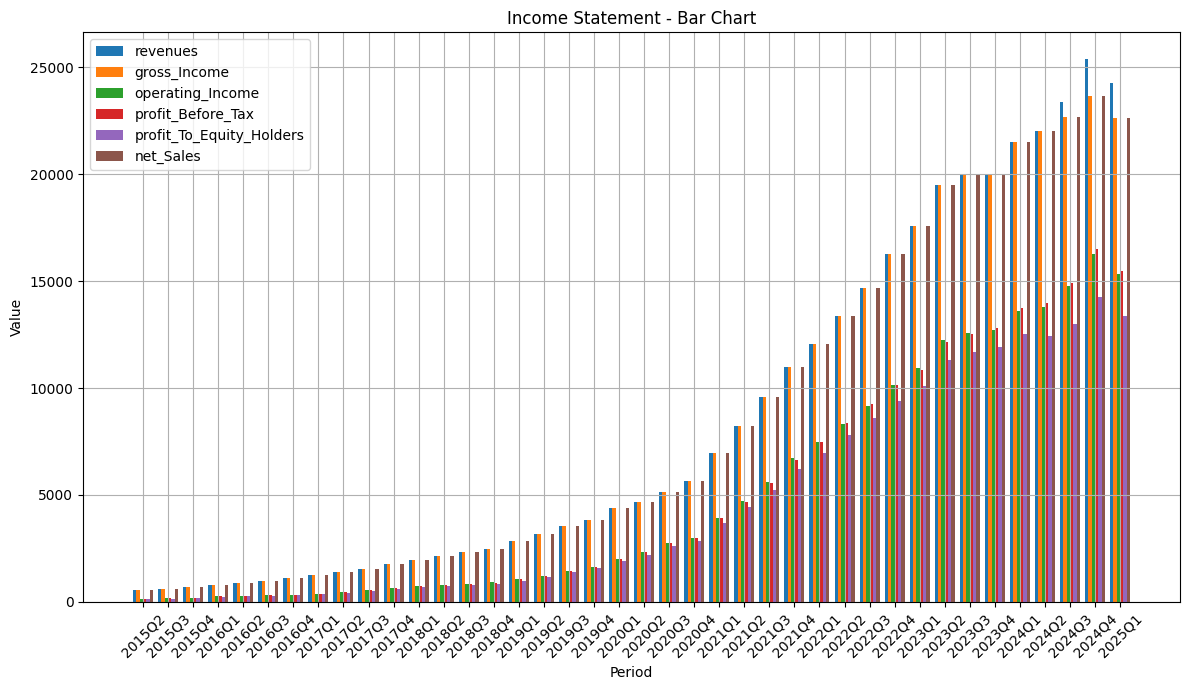

In [4]:
company.income_statement.plot(type="bar")

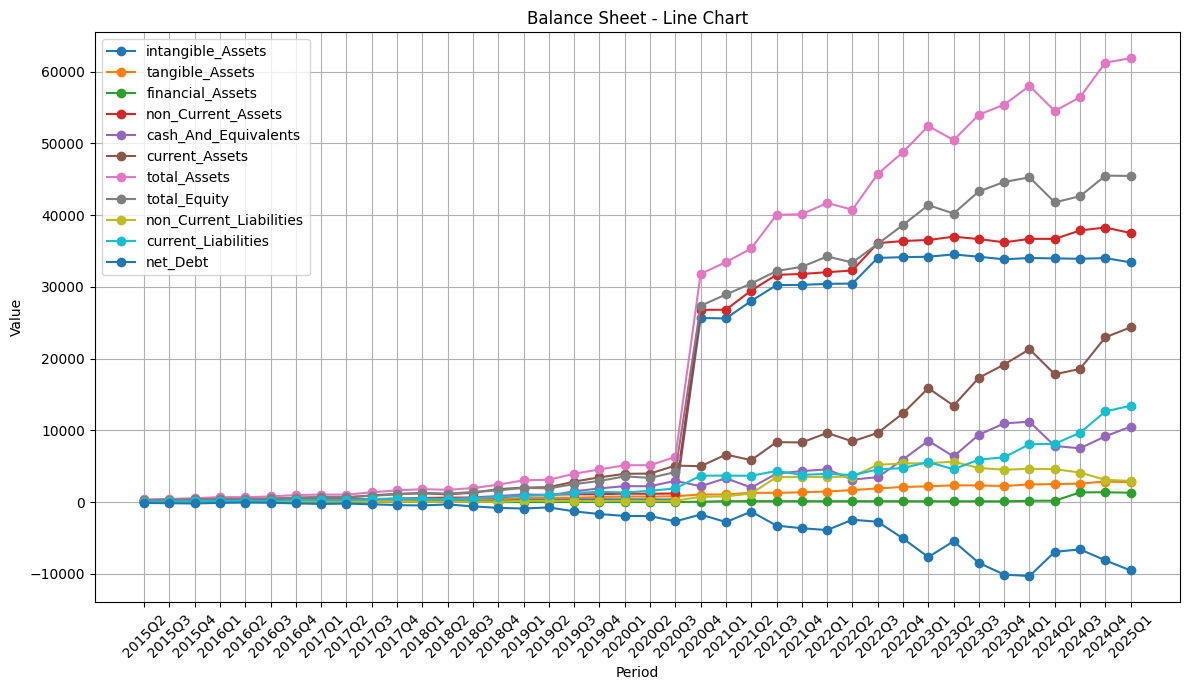

In [5]:
company.balance_sheet.plot()

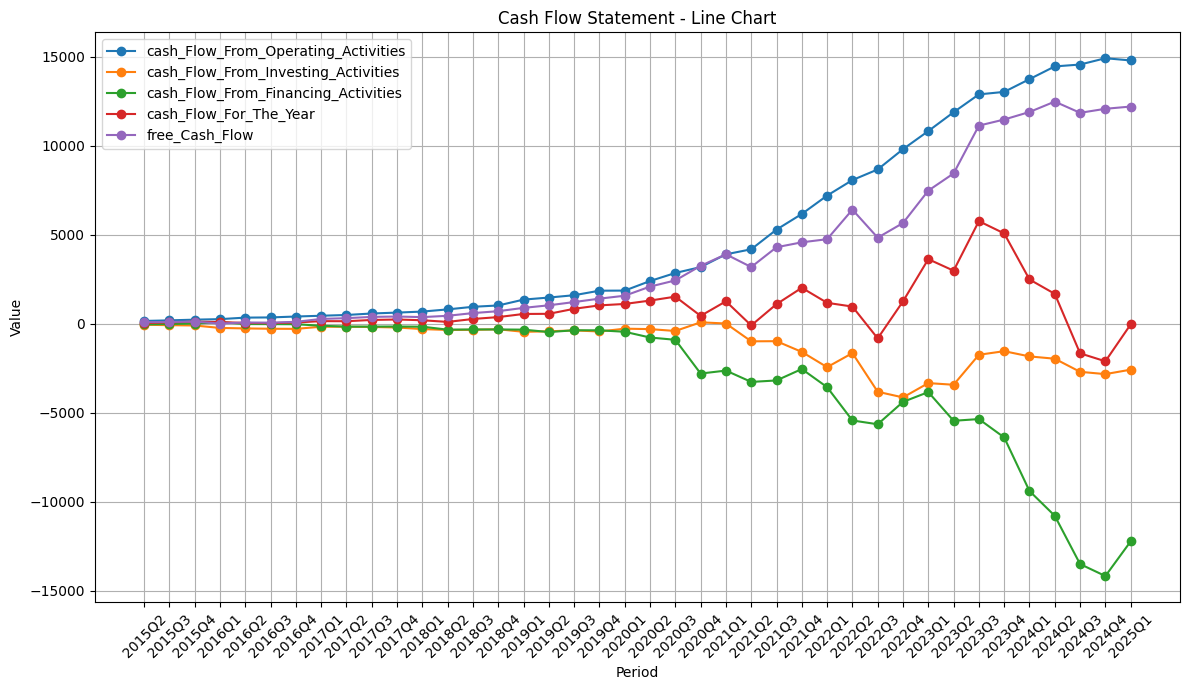

In [6]:
company.cash_flow_statement.plot()

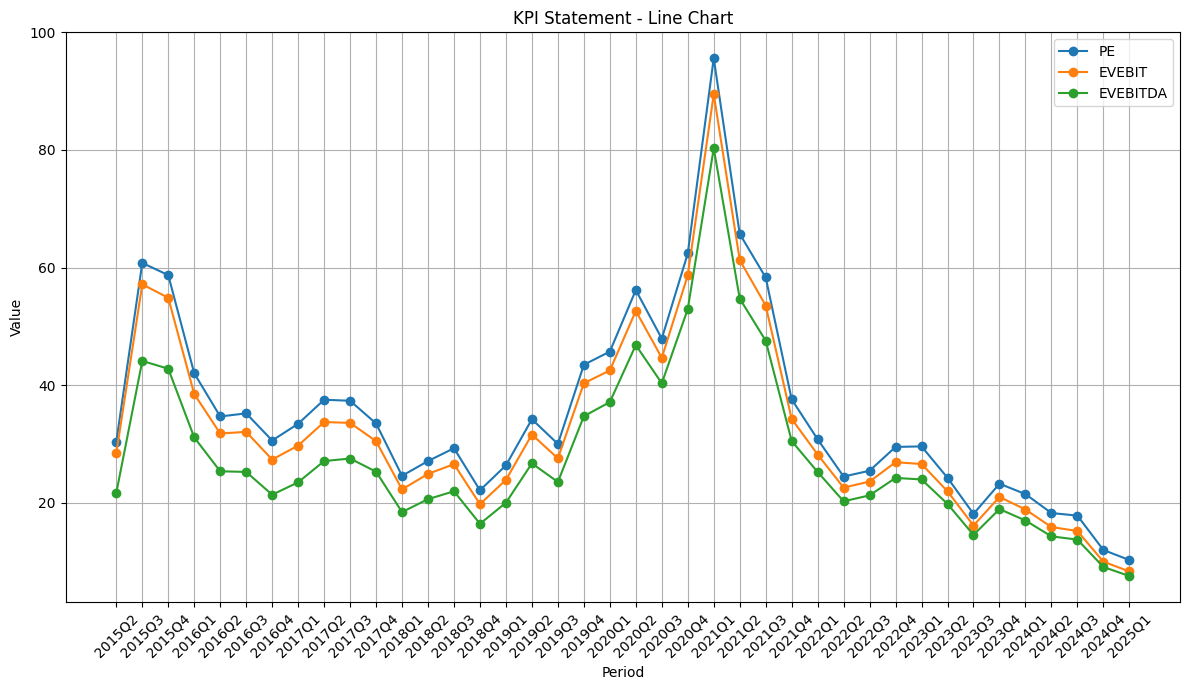

In [7]:
valuation_kpis = ["PE", "EVEBITDA", "EVEBIT"]
company.kpi_statement.plot(include=valuation_kpis)

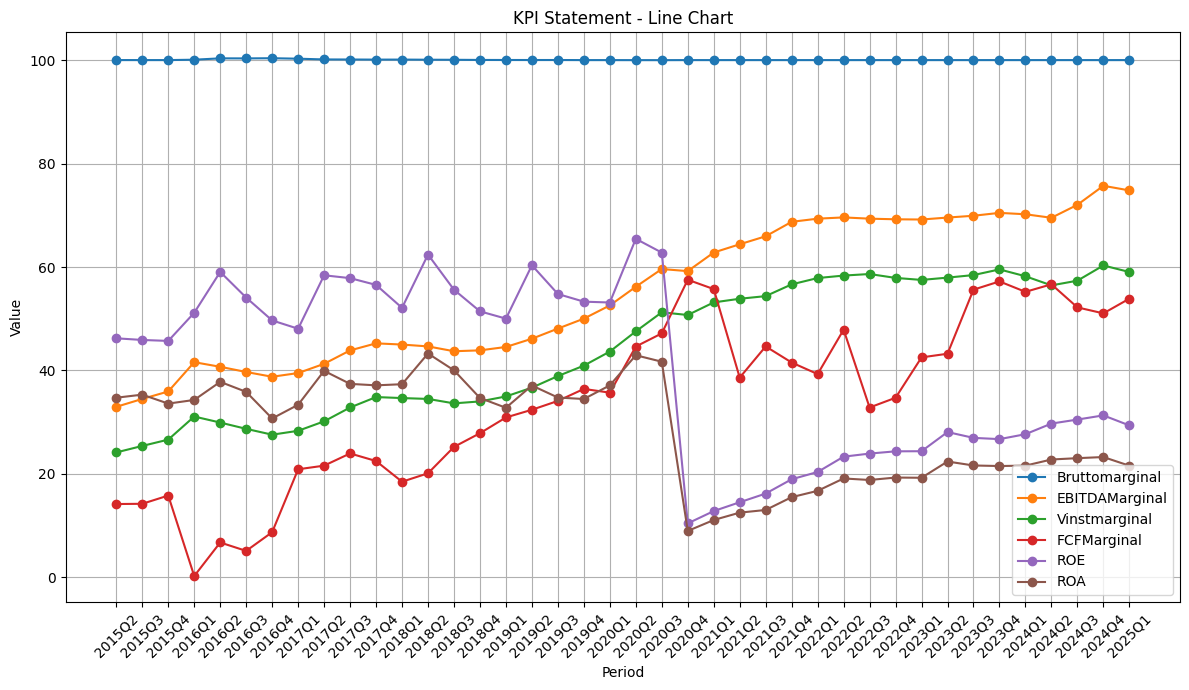

In [8]:
profitability_kpis = ["ROE", "ROA", "FCFMarginal", "Bruttomarginal", "EBITDAMarginal", "Vinstmarginal"]
company.kpi_statement.plot(include=profitability_kpis)

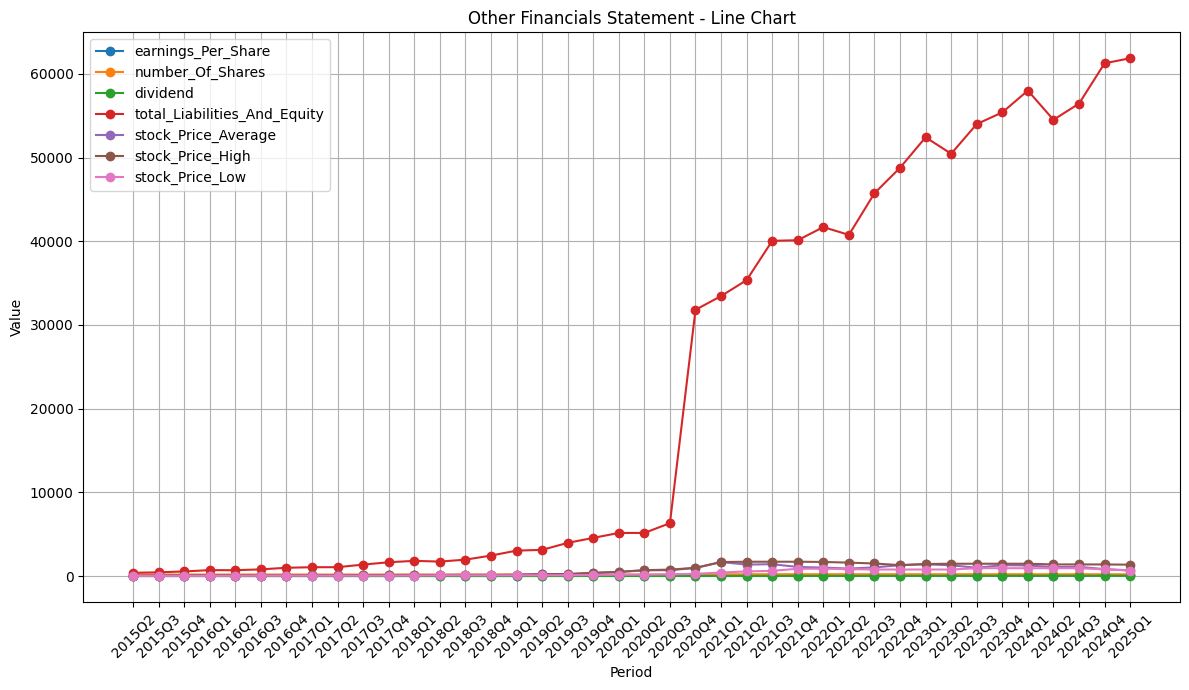

In [9]:
company.other_financials_statement.plot()

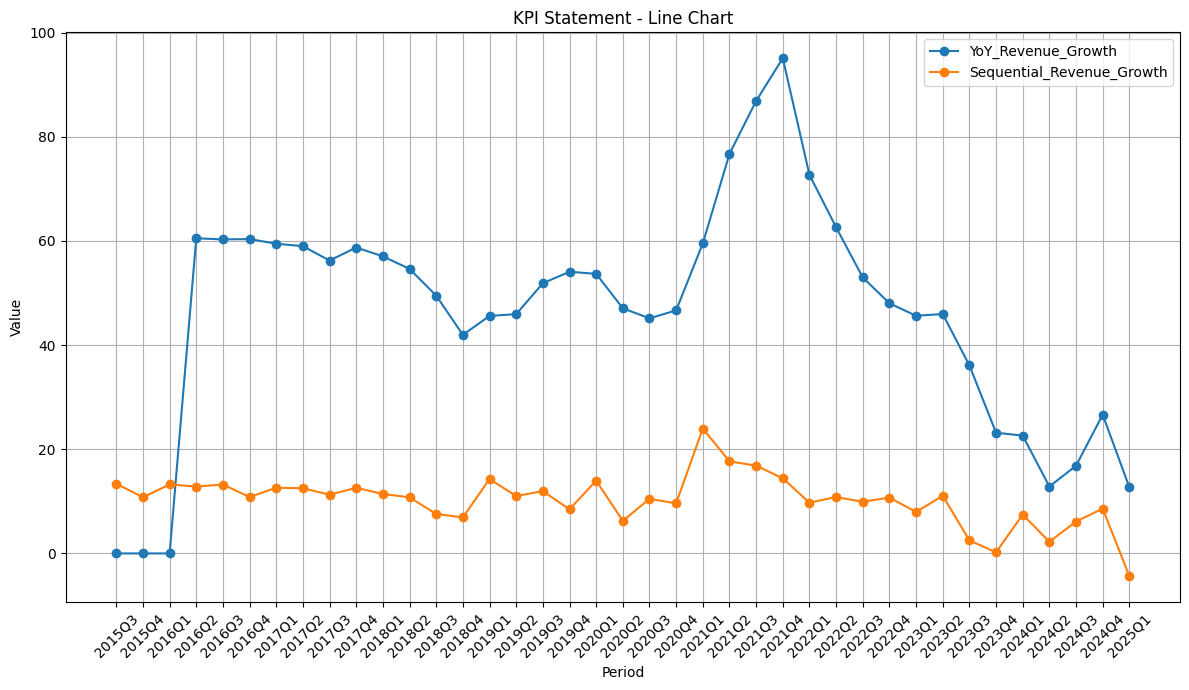

In [10]:
company.kpi_manager.add_percentage_change_kpi(
    kpi_name="YoY_Revenue_Growth",
    item_name="revenues",
    lookback=4
)
company.kpi_manager.add_percentage_change_kpi(
    kpi_name="Sequential_Revenue_Growth",
    item_name="revenues",
    lookback=1
)
company.kpi_manager.calculate_kpi(kpi_name="YoY_Revenue_Growth")
company.kpi_manager.calculate_kpi(kpi_name="Sequential_Revenue_Growth")
company.kpi_statement.plot(include=["YoY_Revenue_Growth", "Sequential_Revenue_Growth"])

# Step 2: Create forecast model

In [11]:
from PyFinModeler import AssumptionSet, ForecastModel, ForecastRule, ChartGenerator
assumptions = AssumptionSet()
forecast_model = ForecastModel(company=company, assumptions=assumptions, periods=12)

In [12]:
# Step 3: Add statistical forecast rule for quarterly frequency
## Normal Distributions
forecast_model.add_forecast_rule(ForecastRule(
    item_name="Sequential_Revenue_Growth",
    method="statistical",
    params={
        "method": "holt_winters",
        "periods": 4,
        "trend": "add",
        "seasonal": "add",
        "seasonal_periods": 4,
        "frequency": "quarter",
    },
    period_range={"start": 1, "end": 4},
))
forecast_model.add_forecast_rule(ForecastRule(
    item_name="Sequential_Revenue_Growth",
    method="statistical",
    params={
        "method": "sarima",
        "periods": 4,
        "order": (1, 1, 1),
        "seasonal_order": (1, 1, 1, 4),
        "trend": "n",
        "frequency": "quarter",
    },
    period_range={"start": 5, "end": 8},
))
forecast_model.add_forecast_rule(ForecastRule(
    item_name="Sequential_Revenue_Growth",
    method="statistical",
    params={
        "method": "normal",
        "periods": 8,
        "mode": "mean",
        "std_multiplier": 1.0,
        "trend": 0.00,
        "frequency": "quarter",
        "random_seed": 42,
    },
    period_range={"start": 9, "end": 12},
))
forecast_model.run_forecast()

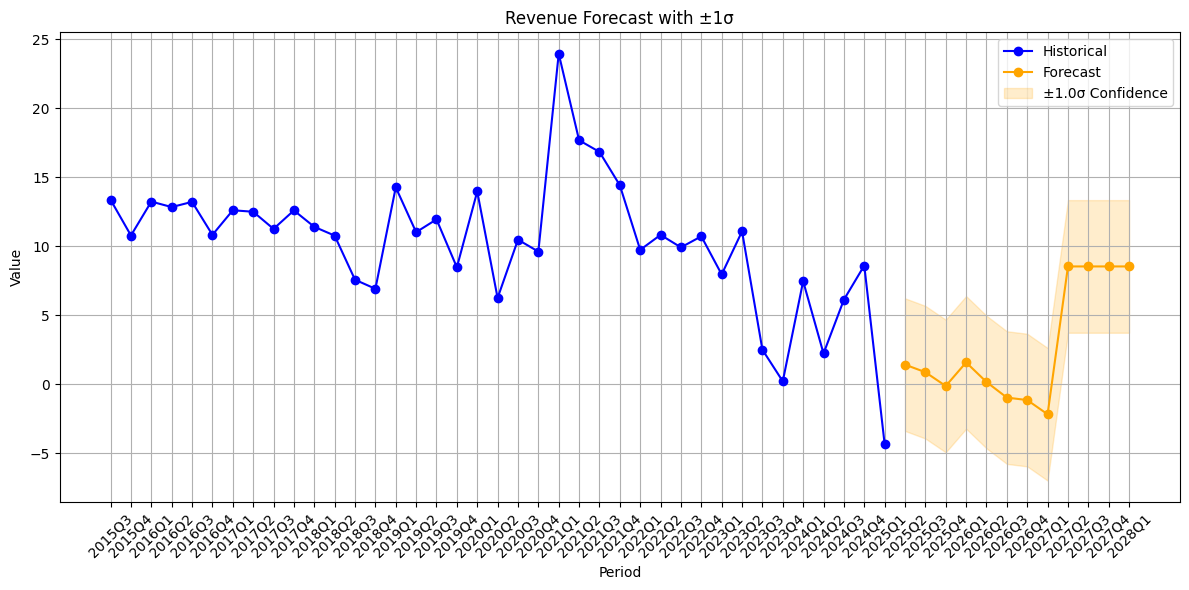

In [13]:
# Step 5: Visualize forecast
chart = ChartGenerator(company)
chart.plot_forecast_with_confidence(
    item_name="Sequential_Revenue_Growth",
    std_multiplier=1.0,
    title="Revenue Forecast with ±1σ"
)

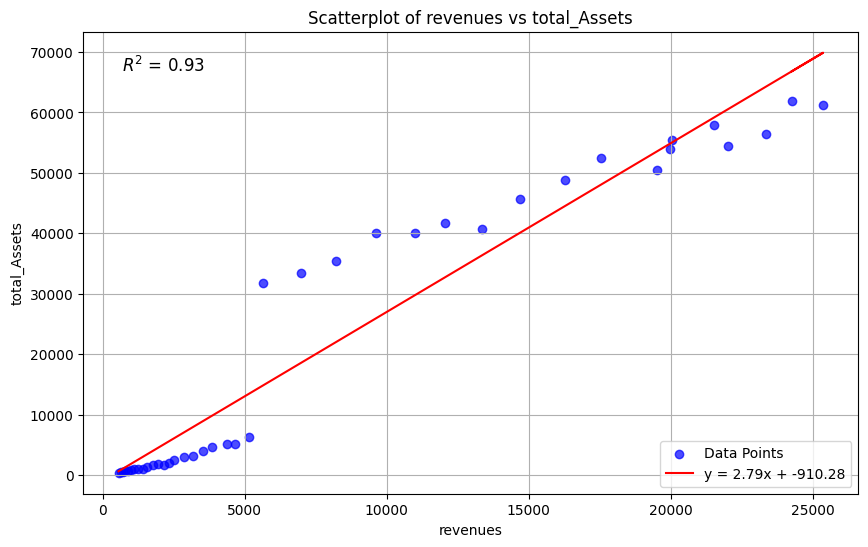

In [14]:
chart.plot_scatter_with_regression(x_item_name="revenues", 
                                   y_item_name="total_Assets")


In [ ]:
from agents import Agent